# Creating Beautiful Soup objects

In [2]:
from bs4 import BeautifulSoup

html = """
    <html>
     <head>
         <title>2020 Oscar nominees and winners</title>
     </head>
     <body>
         <h1 id="oscar_title">Oscars 2020</h1>
         <p>The biggest cinema awards ceremony took place in February. This year's highlights were:</p>
         <ul class="highlights">
             <li>Joker</li>
             <li>1917</li>
             <li>Once Upon a Time in Hollywood</li>
             <li>The Irishman</li>
         </ul>
         <p>See the winners of 3 categories below.</p>
         <div>
             <div class="best-film-category">
                 <h2>Category: best film</h2>
                 <ul>
                     <li>Ford vs Ferrari</li>
                     <li>The Irishman</li>
                     <li>JoJo Rabbit</li>
                     <li>Joker</li>
                     <li>Little Women</li>
                     <li>Marriage Story</li>
                     <li>1917</li>
                     <li>Once Upon a Time in Hollywood</li>
                     <li class="winner">Parasite <strong>[WINNER]</strong></li>
                 </ul>
             </div>
             <br>
             <div class="best-actor-category">
                 <h2>Category: best actor</h2>
                 <ul>
                     <li>Antonio Banderas - Pain and Glory</li>
                     <li>Leonardo DiCaprio - Once Upon a Time In... Hollywood</li>
                     <li>Adam Driver - Marriage Story</li>
                     <li class="winner">Joaquin Phoenix - Joker <strong>[WINNER]</strong></li>
                     <li>Jonathan Price - The Two Popes</li>
                 </ul>
             </div>
             <br>
             <div class="best-actress-category">
                 <h2>Category: best actress</h2>
                 <ul>
                     <li>Cythia Erivo - Harriet</li>
                     <li>Scarlett Johansson - Marriage Story</li>
                     <li>Saoirse Ronan - Little Women</li>
                     <li>Charlize Theron - The Scandal</li>
                     <li class="winner">Renée Zellweger - Judy: Far Over the Rainbow <strong>[WINNER]</strong></li>
                 </ul>
             </div>
         </div>
     </body>
</html>"""

In [3]:
# Instantiate Soup Object and Print Pretty HTML
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())


<html>
 <head>
  <title>
   2020 Oscar nominees and winners
  </title>
 </head>
 <body>
  <h1 id="oscar_title">
   Oscars 2020
  </h1>
  <p>
   The biggest cinema awards ceremony took place in February. This year's highlights were:
  </p>
  <ul class="highlights">
   <li>
    Joker
   </li>
   <li>
    1917
   </li>
   <li>
    Once Upon a Time in Hollywood
   </li>
   <li>
    The Irishman
   </li>
  </ul>
  <p>
   See the winners of 3 categories below.
  </p>
  <div>
   <div class="best-film-category">
    <h2>
     Category: best film
    </h2>
    <ul>
     <li>
      Ford vs Ferrari
     </li>
     <li>
      The Irishman
     </li>
     <li>
      JoJo Rabbit
     </li>
     <li>
      Joker
     </li>
     <li>
      Little Women
     </li>
     <li>
      Marriage Story
     </li>
     <li>
      1917
     </li>
     <li>
      Once Upon a Time in Hollywood
     </li>
     <li class="winner">
      Parasite
      <strong>
       [WINNER]
      </strong>
     </li>
    </ul>
   

In [4]:
# Print Title Text
print(soup.title) # includes tag
print(soup.title.get_text()) # retrieves only inner text

<title>2020 Oscar nominees and winners</title>
2020 Oscar nominees and winners


In [5]:
# To get FIRST <h2> Tag
print(soup.h2)

<h2>Category: best film</h2>


In [6]:
# Find and print the FIRST <ul> Tag, then find and print the FIRST <li> Tag within the <ul>
print(soup.ul.li) # Includes Tag
print(soup.ul.li.get_text()) # Only Text

<li>Joker</li>
Joker


In [7]:
# To find and list all the <li> elements contained within the first element that has the class best-actress-category
soup.find_all(class_='best-actress-category')[0].find_all('li') # Returns List with all <li> items

# Also WORKS:
soup.find(class_='best-actress-category').find_all('li')

[<li>Cythia Erivo - Harriet</li>,
 <li>Scarlett Johansson - Marriage Story</li>,
 <li>Saoirse Ronan - Little Women</li>,
 <li>Charlize Theron - The Scandal</li>,
 <li class="winner">Renée Zellweger - Judy: Far Over the Rainbow <strong>[WINNER]</strong></li>]

In [8]:
# Challenge: extract the first actress listed under the best-actress-category class
soup.find(class_='best-actress-category').find_all("li")[0].get_text()

'Cythia Erivo - Harriet'

# Creating Beautiful Soup objects with requests and Importing requests library and fetching the webpage

In [9]:
import requests
response = requests.get("https://www.scrapethissite.com/pages/simple/")

# Prints the first 100 characters of the webpage's HTML content to quickly check if we retreived from the correct page
print(response.text[:100])

# Instantiate soup object
websoup = BeautifulSoup(response.text, 'html.parser')

<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Countries of the Wor


In [10]:
# Access the Title of the Page
print(f"Title: {websoup.title.get_text()}")

Title: Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping


In [11]:
# Uses find_all to locate all elements with the class country-name in the parsed HTML, storing them in the variable countries.
countries = websoup.find_all(class_='country-name')

print(countries[0])

<h3 class="country-name">
<i class="flag-icon flag-icon-ad"></i>
                            Andorra
                        </h3>


In [12]:
# Iterates over each element in countries, extracts the text, removes any surrounding whitespace
# and stores the cleaned country names in a new list countries.
countries = [c.get_text().strip() for c in countries]

# Print First 5 Countries
print(countries[:5])

['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Anguilla']


# Using Pandas to Facilitate Data Manipulation and Analysis

In [13]:
import pandas as pd
# Finds all elements with class country-capital, extracts, cleans, and stores the capital names in the list capitals.
capitals = websoup.find_all(class_='country-capital')
capitals = [capital.get_text().strip() for capital in capitals]

# Same for Country-Population
populations = websoup.find_all(class_="country-population")
populations = [population.get_text().strip() for population in populations]

# Finds, extracts, cleans, and stores the area data for each country in the list areas.
areas = websoup.find_all(class_="country-area")
areas = [area.get_text().strip() for area in areas]

# Quick Check
print(capitals[:5])
print(populations[:5])
print(areas[:5])

['Andorra la Vella', 'Abu Dhabi', 'Kabul', "St. John's", 'The Valley']
['84000', '4975593', '29121286', '86754', '13254']
['468.0', '82880.0', '647500.0', '443.0', '102.0']


In [14]:
# Use the pandas library to create a DataFrame named data, consolidating the lists countries, capitals, populations, and areas 
# into a tabular format with corresponding column names.
df = pd.DataFrame({
    "Country" : countries,
    "Capital" : capitals,
    "Population" : populations,
    "Area" : areas
})

# Check First 5 Rows
df.head()

,Country,Capital,Population,Area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


# Challenge

In [15]:
url = 'https://www.scrapethissite.com/pages/forms/'
response = requests.get(url)

# CHECK
print(response.text[:100])

# Instantiate soup object
hosoup = BeautifulSoup(response.text, 'html.parser')

<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Hockey Teams: Forms,


In [16]:
# Check
print(hosoup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Hockey Teams: Forms, Searching and Pagination | Scrape This Site | A public sandbox for learning web scraping
  </title>
  <link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="Browse through a database of NHL team stats since 1990. Practice building a scraper that handles common website interface components." name="description"/>
  <link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
  <link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
  <meta con

In [17]:
# Print Title
print(hosoup.title.get_text())

Hockey Teams: Forms, Searching and Pagination | Scrape This Site | A public sandbox for learning web scraping


In [18]:
# Retrieve Team Names
teams = hosoup.find_all(class_='name')
teams = [name.get_text().strip() for name in teams]

# Retrieve Wins
wins = hosoup.find_all(class_='wins')
wins = [int(win.get_text().strip()) for win in wins]

# Retrieve Losses
losses = hosoup.find_all(class_='losses')
losses = [int(loss.get_text().strip()) for loss in losses]

# Retrieve GF
goals_for = hosoup.find_all(class_='gf')
goals_for = [int(goal.get_text().strip()) for goal in goals_for]

# Retrieve GA
goals_against = hosoup.find_all(class_='ga')
goals_against = [int(goal.get_text().strip()) for goal in goals_against]

# Check
print(teams[:5])
print(wins[:5]) 
print(losses[:5])
print(goals_for[:5])
print(goals_against[:5])

['Boston Bruins', 'Buffalo Sabres', 'Calgary Flames', 'Chicago Blackhawks', 'Detroit Red Wings']
[44, 31, 46, 49, 34]
[24, 30, 26, 23, 38]
[299, 292, 344, 284, 273]
[264, 278, 263, 211, 298]


In [19]:
# Turn into a Dataframe
df_hockey = pd.DataFrame({
    "Team Name" : teams,
    "Wins" : wins,
    "Losses" : losses,
    "Goals For" : goals_for,
    "Goals Against" : goals_against
})

# Check
df_hockey

,Team Name,Wins,Losses,Goals For,Goals Against
0,Boston Bruins,44,24,299,264
1,Buffalo Sabres,31,30,292,278
2,Calgary Flames,46,26,344,263
3,Chicago Blackhawks,49,23,284,211
4,Detroit Red Wings,34,38,273,298
5,Edmonton Oilers,37,37,272,272
6,Hartford Whalers,31,38,238,276
7,Los Angeles Kings,46,24,340,254
8,Minnesota North Stars,27,39,256,266
9,Montreal Canadiens,39,30,273,249


In [20]:
# Alter Dataframe
df_hockey['W/L Ratio'] = (df_hockey['Wins'] / (df_hockey['Wins'] + df_hockey['Losses']))
df_hockey['Goal Difference'] = df_hockey['Goals For'] - df_hockey['Goals Against']
df_hockey['Year'] = 1990

df_hockey

,Team Name,Wins,Losses,Goals For,Goals Against,W/L Ratio,Goal Difference,Year
0,Boston Bruins,44,24,299,264,0.647059,35,1990
1,Buffalo Sabres,31,30,292,278,0.508197,14,1990
2,Calgary Flames,46,26,344,263,0.638889,81,1990
3,Chicago Blackhawks,49,23,284,211,0.680556,73,1990
4,Detroit Red Wings,34,38,273,298,0.472222,-25,1990
5,Edmonton Oilers,37,37,272,272,0.500000,0,1990
6,Hartford Whalers,31,38,238,276,0.449275,-38,1990
7,Los Angeles Kings,46,24,340,254,0.657143,86,1990
8,Minnesota North Stars,27,39,256,266,0.409091,-10,1990
9,Montreal Canadiens,39,30,273,249,0.565217,24,1990


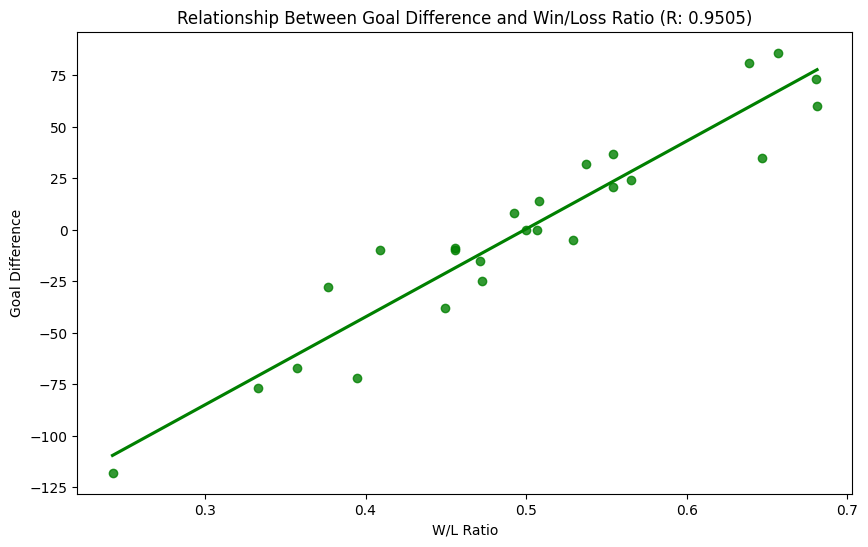

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation
corr_value = df_hockey['W/L Ratio'].corr(df_hockey['Goal Difference'])

# Visualize Correlation Between W/L Ratio and Goal Difference
plt.figure(figsize=(10,6))
sns.regplot(data=df_hockey, x='W/L Ratio', y='Goal Difference', color="green", ci=None)
plt.title(f"Relationship Between Goal Difference and Win/Loss Ratio (R: {corr_value:.4f})")
plt.show()